In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.ndimage import correlate
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import rescale,resize

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [41]:
img = data.coffee()

img.shape

(400, 600, 3)

torch.Size([1, 64, 64])


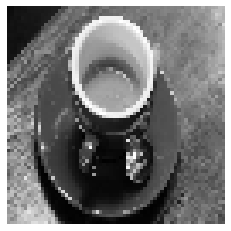

In [42]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Resize((64, 64)),
    transforms.Grayscale()
])

im = transform(img)
print(im.shape)

plt.axis('off')
plt.imshow(im[0], cmap = 'gray');

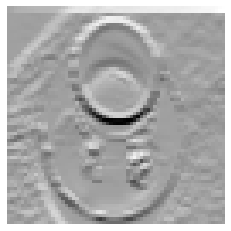

In [47]:
filter1 = torch.tensor([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

new_image = torch.zeros_like(im)[0]
im_pad = torch.nn.ConstantPad2d(1, 0)(im)[0]
e = 0
for i in range(im.shape[1]):
    for j in range(im.shape[2]):
        try:
            new_image[i,j] = \
            im_pad[i-1,j-1] * filter1[0,0] + \
            im_pad[i-1,j] * filter1[0,1] + \
            im_pad[i-1,j+1] * filter1[0,2] + \
            im_pad[i,j-1] * filter1[1,0] + \
            im_pad[i,j] * filter1[1,1] + \
            im_pad[i,j+1] * filter1[1,2] +\
            im_pad[i+1,j-1] * filter1[2,0] + \
            im_pad[i+1,j] * filter1[2,1] + \
            im_pad[i+1,j+1] * filter1[2,2] 
        except Exception as E:
            e += 1
            pass
plt.axis('off')
plt.imshow(new_image, cmap='Greys')

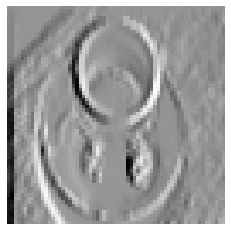

In [51]:
filter2 = torch.tensor([
    [ -1,  0,  1],
    [ -1,  0,  1],
    [ -1,  0,  1]
])

new_image = torch.zeros_like(im)[0]
im_pad = torch.nn.ConstantPad2d(1, 0)(im)[0]
for i in range(im.shape[1]):
    for j in range(im.shape[2]):
        try:
            new_image[i,j] = \
            im_pad[i-1,j-1] * filter2[0,0] + \
            im_pad[i-1,j] * filter2[0,1] + \
            im_pad[i-1,j+1] * filter2[0,2] + \
            im_pad[i,j-1] * filter2[1,0] + \
            im_pad[i,j] * filter2[1,1] + \
            im_pad[i,j+1] * filter2[1,2] +\
            im_pad[i+1,j-1] * filter2[2,0] + \
            im_pad[i+1,j] * filter2[2,1] + \
            im_pad[i+1,j+1] * filter2[2,2] 
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

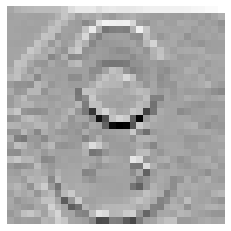

In [54]:
filter2 = torch.tensor([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

stride = 2

new_image = torch.zeros((int(im.shape[1] / stride), int(im.shape[2] / stride)))
im_pad = torch.nn.ConstantPad2d(1, 0)(im)[0]
for i in range(0, im.shape[1], stride):
    for j in range(0, im.shape[2], stride):
        try:
            new_image[int(i/stride),int(j/stride)] = \
            im_pad[i-1,j-1] * filter1[0,0] + \
            im_pad[i-1,j] * filter1[0,1] + \
            im_pad[i-1,j+1] * filter1[0,2] + \
            im_pad[i,j-1] * filter1[1,0] + \
            im_pad[i,j] * filter1[1,1] + \
            im_pad[i,j+1] * filter1[1,2] +\
            im_pad[i+1,j-1] * filter1[2,0] + \
            im_pad[i+1,j] * filter1[2,1] + \
            im_pad[i+1,j+1] * filter1[2,2] 
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

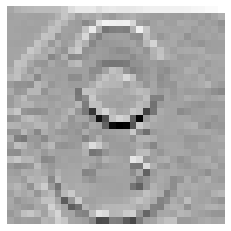

In [57]:
filter2 = torch.tensor([
    [ -1,  0,  1],
    [ -1,  0,  1],
    [ -1,  0,  1]
])

stride = 2

new_image = torch.zeros((int(im.shape[1] / stride), int(im.shape[2] / stride)))
im_pad = torch.nn.ConstantPad2d(1, 0)(im)[0]
for i in range(0, im.shape[1], stride):
    for j in range(0, im.shape[2], stride):
        try:
            new_image[int(i/stride),int(j/stride)] = \
            im_pad[i-1,j-1] * filter1[0,0] + \
            im_pad[i-1,j] * filter1[0,1] + \
            im_pad[i-1,j+1] * filter1[0,2] + \
            im_pad[i,j-1] * filter1[1,0] + \
            im_pad[i,j] * filter1[1,1] + \
            im_pad[i,j+1] * filter1[1,2] +\
            im_pad[i+1,j-1] * filter1[2,0] + \
            im_pad[i+1,j] * filter1[2,1] + \
            im_pad[i+1,j+1] * filter1[2,2] 
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

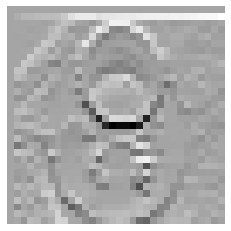

In [61]:
filter2 = torch.tensor([
    [ -1,  0,  1],
    [ -1,  0,  1],
    [ -1,  0,  1]
])

stride = 2

new_image = torch.zeros((int(im.shape[1] / stride), int(im.shape[2] / stride)))
im_pad = torch.nn.ConstantPad2d(2, 0)(im)[0]
for i in range(0, im.shape[1], stride):
    for j in range(0, im.shape[2], stride):
        try:
            new_image[int(i/stride),int(j/stride)] = \
            im_pad[i-1,j-1] * filter1[0,0] + \
            im_pad[i-1,j] * filter1[0,1] + \
            im_pad[i-1,j+1] * filter1[0,2] + \
            im_pad[i,j-1] * filter1[1,0] + \
            im_pad[i,j] * filter1[1,1] + \
            im_pad[i,j+1] * filter1[1,2] +\
            im_pad[i+1,j-1] * filter1[2,0] + \
            im_pad[i+1,j] * filter1[2,1] + \
            im_pad[i+1,j+1] * filter1[2,2] 
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');